Importa las librerias necesarias para el proyecto

In [24]:
import pandas as pd
from numpy import array
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score


Este código realiza los pasos iniciales de carga y preprocesamiento de datos:

1. Lee el archivo 'games.csv' en un DataFrame de pandas. Cada fila en el DataFrame representa un juego, y cada columna representa una característica del juego.

2. Define una lista de nombres de columnas que queremos excluir de nuestro DataFrame. Estas columnas no son necesarias para nuestro análisis.

3. Elimina las columnas listadas en la lista `exclude` del DataFrame. El DataFrame resultante, `games_crop`, contiene solo las columnas en las que estamos interesados para nuestro análisis.

In [25]:
games_df = pd.read_csv('games.csv')

exclude = ['AppID', 'Name', 'Release date', 'About the game', 'Header image', 'Website','Categories', 'Tags','Support url', 'Developers', 'Publishers', 'Support email', 'Metacritic url', 'Notes',  'Genres', 'Screenshots', 'Movies',  'Reviews',   'Supported languages', 'Full audio languages', 'User score',  'Movies',  'Score rank']
games_crop = games_df.drop(exclude, axis=1)

Se realiza la codificación de etiquetas en la columna 'Estimated owners' del DataFrame `games_crop` y luego elimina esa columna del DataFrame. Aquí está el desglose paso a paso:

1. Crea una instancia de la clase `LabelEncoder` del módulo sklearn.preprocessing. LabelEncoder se utiliza para transformar etiquetas no numéricas a etiquetas numéricas.

2. Aplica el codificador de etiquetas a la columna 'Estimated owners' del DataFrame `games_crop`. El método `fit_transform` ajusta el codificador de etiquetas y devuelve las etiquetas codificadas.

3. Convierte la columna 'Estimated owners' (que ahora está codificada con etiquetas) a una lista y la almacena en la variable `estimated_owners_list`.

4. Elimina la columna 'Estimated owners' del DataFrame `games_crop`. El parámetro `inplace=True` significa que la operación se realiza en el lugar en el DataFrame y devolverá None.

In [26]:
le = LabelEncoder()

games_crop['Estimated owners'] = le.fit_transform(games_crop['Estimated owners'])

estimated_owners_list = games_crop['Estimated owners'].tolist()

games_crop.drop(['Estimated owners'], axis=1, inplace=True)

Esta línea de código utiliza la función `train_test_split` del módulo model_selection de sklearn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

In [27]:

X_train, X_test, y_train, y_test = train_test_split(games_crop, estimated_owners_list, test_size=0.2, random_state=42)

Crea un modelo con la parametrización óptima y lo ajusta a los datos de entrenamiento. Luego, predice valores a partir de las datos de prueba.

In [31]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy',max_features='sqrt',bootstrap=False)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

Despliega las metricas de rendimiento del modelo.

In [29]:
# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print formatted output
print(f"F1 Score: {f1:.2f}\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}")

F1 Score: 0.78
Accuracy: 0.80
Precision: 0.77
Recall: 0.80


Despliega una comparación de las predicciones con los valores reales.

In [30]:
predDf = pd.DataFrame({'Actual': le.inverse_transform(y_test), 'Predicted': le.inverse_transform(y_pred)})
display(predDf)

,Actual,Predicted
0,0 - 20000,0 - 20000
1,0 - 0,0 - 20000
2,0 - 20000,0 - 20000
3,0 - 20000,0 - 20000
4,0 - 20000,0 - 20000
...,...,...
15712,0 - 20000,0 - 20000
15713,0 - 20000,0 - 20000
15714,0 - 20000,0 - 20000
15715,0 - 20000,0 - 20000


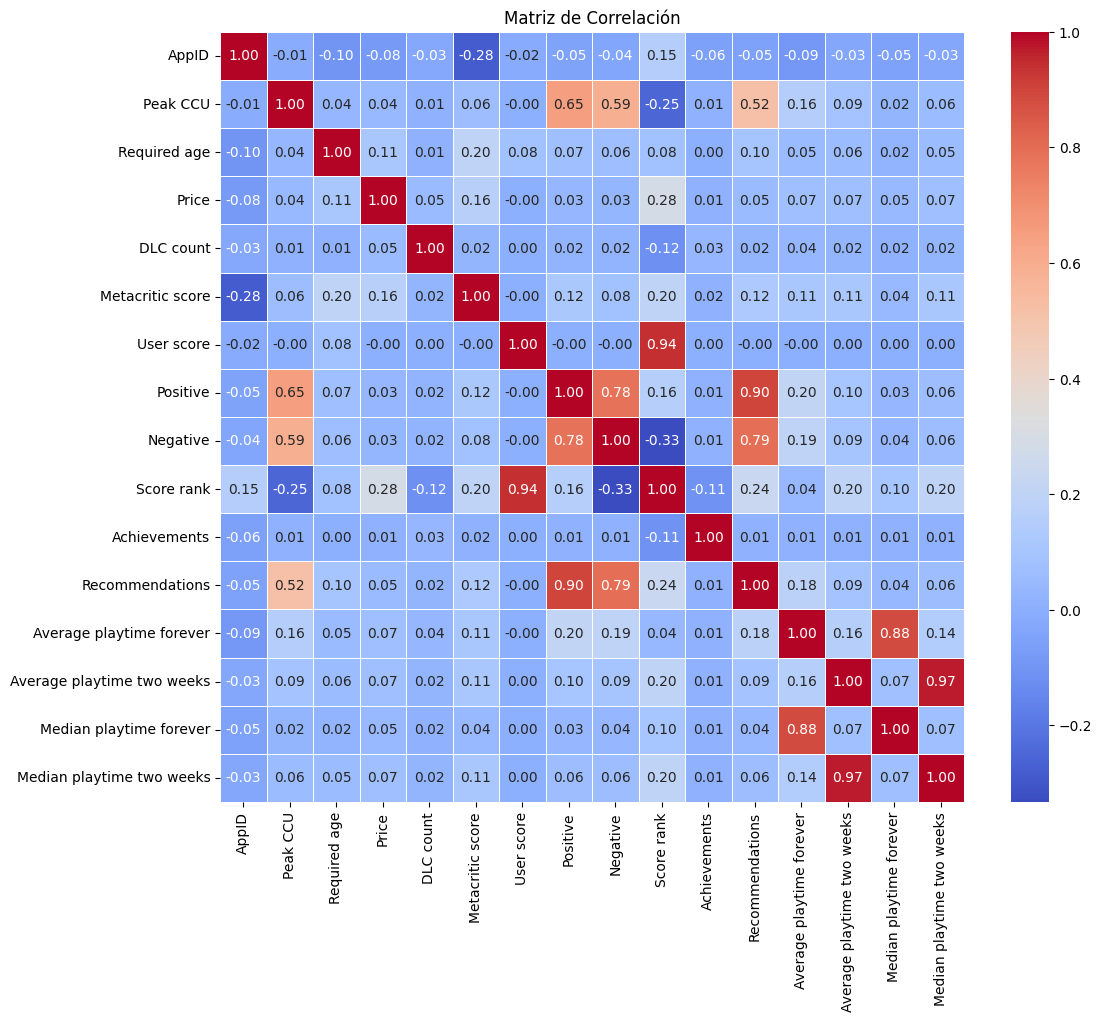

In [33]:
# Crear una copia del DataFrame original
games_df_numeric = games_df.copy()

# Eliminar las columnas no numéricas
games_df_numeric = games_df_numeric.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = games_df_numeric.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

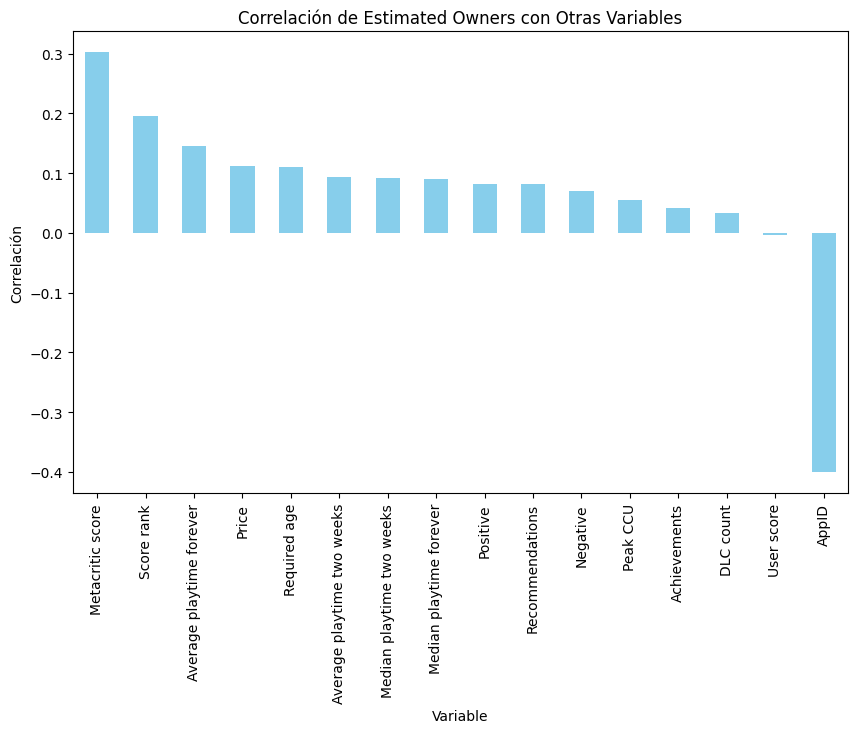

In [36]:
# Crear una copia del DataFrame original
games_df_numeric = games_df.copy()

# Eliminar las columnas no numéricas
games_df_numeric = games_df_numeric.select_dtypes(include=[np.number])

# Inicializar el LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'estimated_owners' con LabelEncoder
games_df_numeric['Estimated owners'] = le.fit_transform(games_df_numeric['Estimated owners'])

# Calcular la correlación de 'Estimated owners' con otras variables
correlation_with_owners = games_df_numeric.corr()['Estimated owners'].sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
correlation_with_owners.drop('Estimated owners').plot(kind='bar', color='skyblue')
plt.title('Correlación de Estimated Owners con Otras Variables')
plt.xlabel('Variable')
plt.ylabel('Correlación')
plt.show()